# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:
new_cities = []
max_temp = []
humidity = []
cloud = []
wind = []
lat = []
lng = []
country = []
date = []
base_url = "http://api.openweathermap.org/data/2.5/weather"
url = f"{base_url}?appid={weather_api_key}&q="

for city in cities:
    print(f"Getting data for: " + city)
    request_url = f"{url}{city}"
    response=requests.get(request_url)
    time.sleep(1.5)
    try:
        response.raise_for_status()
        data = response.json()
        new_cities.append(data['name'])
        max_temp.append(data['main']['temp_max'])
        humidity.append(data['main']['humidity'])                  
        cloud.append(data['clouds']['all'])
        wind.append(data['wind']['speed'])
        lat.append(data['coord']['lat'])
        lng.append(data['coord']['lon'])
        country.append(data['sys']['country'])
        date.append(data['dt'])
    except requests.HTTPError as e:
        print("City not found: " + city)
        

Getting data for: puerto ayora
Getting data for: bayir
Getting data for: dawlatabad
Getting data for: albany
Getting data for: lavrentiya
Getting data for: tiksi
Getting data for: port alfred
Getting data for: akureyri
Getting data for: kusti
Getting data for: khatanga
Getting data for: atuona
Getting data for: padang
Getting data for: georgetown
Getting data for: rikitea
Getting data for: new norfolk
Getting data for: avarua
Getting data for: luchenza
Getting data for: palma soriano
Getting data for: bethel
Getting data for: luzon
Getting data for: illoqqortoormiut
City not found: illoqqortoormiut
Getting data for: rocha
Getting data for: provideniya
Getting data for: hithadhoo
Getting data for: busselton
Getting data for: tabivere
Getting data for: atambua
Getting data for: khandyga
Getting data for: banda aceh
Getting data for: beisfjord
Getting data for: nova serrana
Getting data for: praia
Getting data for: hobart
Getting data for: zhenjiang
Getting data for: punta arenas
Getting 

City not found: karaul
Getting data for: atar
Getting data for: boguchany
Getting data for: zaraysk
Getting data for: alice springs
Getting data for: najran
Getting data for: karpathos
Getting data for: huancavelica
Getting data for: port pirie
Getting data for: kpandae
Getting data for: yulara
Getting data for: shingu
Getting data for: gagnoa
Getting data for: canto do buriti
Getting data for: russkaya polyana
Getting data for: nguiu
City not found: nguiu
Getting data for: pimentel
Getting data for: richards bay
Getting data for: yenagoa
Getting data for: cowra
Getting data for: vrbno pod pradedem
Getting data for: san quintin
Getting data for: camopi
Getting data for: zunyi
Getting data for: mao
Getting data for: waingapu
Getting data for: udachnyy
Getting data for: ulaangom
Getting data for: taoudenni
Getting data for: faanui
Getting data for: talaya
Getting data for: grindavik
Getting data for: khonuu
City not found: khonuu
Getting data for: saldanha
Getting data for: ust-kamchatsk

City not found: umzimvubu
Getting data for: demyansk
Getting data for: sabha
Getting data for: tautira
Getting data for: bubaque
Getting data for: naze
Getting data for: arlit
Getting data for: iracoubo
Getting data for: svetlogorsk
Getting data for: linxia
Getting data for: boende
Getting data for: tomatlan
Getting data for: bandarbeyla
Getting data for: pathalgaon
Getting data for: mayo
Getting data for: mount gambier
Getting data for: leshan
Getting data for: rey bouba
Getting data for: longlac
City not found: longlac
Getting data for: dire dawa
Getting data for: ilulissat
Getting data for: campbellton
Getting data for: akdepe
Getting data for: anaconda
Getting data for: rafraf
Getting data for: viadana
Getting data for: majene
Getting data for: bhawana
Getting data for: sorland
Getting data for: show low
Getting data for: mugumu
Getting data for: port blair
Getting data for: eureka
Getting data for: mirzapur
Getting data for: saint-georges
Getting data for: adre
Getting data for: c

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [25]:
weather_df = pd.DataFrame({
    'city': new_cities,
    'Lat': lat,
    'Lng':lng,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloud,
    'Wind Speed': wind,
    'Country': country,
    'Date': date
})


In [26]:
weather_df.to_csv('weatherpy.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [18]:
#  Get the indices of cities that have humidity over 100%.
hothum = weather_df[weather_df['Humidity'] > 100]
hothum

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
drop_humidity = weather_df[weather_df['Humidity'] <= 100]
drop_humidity

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.7393,-90.3518,296.79,86,89,2.68,EC,1621390833
1,Bayir,37.2687,28.2167,284.44,57,0,1.45,TR,1621391003
2,Dawlatabad,36.4141,64.9053,299.51,13,0,1.22,AF,1621391005
3,Albany,42.6001,-73.9662,291.49,82,43,2.51,US,1621391289


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

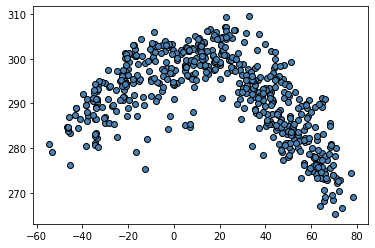

In [27]:
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "steelblue", edgecolor = "black")

## Latitude vs. Humidity Plot

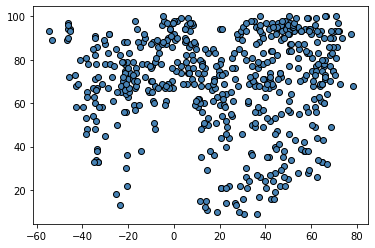

In [28]:
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "steelblue", edgecolor = "black")

## Latitude vs. Cloudiness Plot

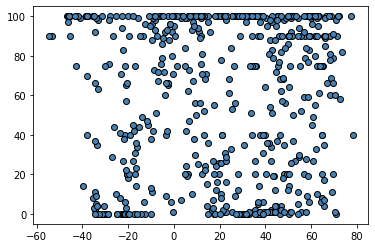

In [29]:
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

## Latitude vs. Wind Speed Plot

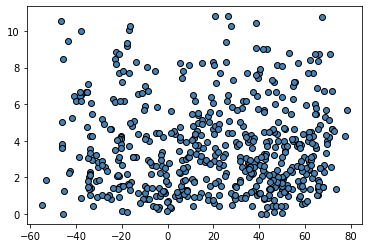

In [30]:
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "steelblue", edgecolor = "black")

## Linear Regression

In [ ]:
nort_hem = weather_df.loc[weather_df['Lat'] >= 0]
south_hem = weather_df.loc[weather_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression